In [1]:
import pandas as pd


In [2]:
import talib



In [3]:

# Load CSV
stock_data = pd.read_csv(
    r"C:\Users\THINKPAD\Desktop\10_Academy\Week_1\week_one_project\data\yfinance_data (1)\Data\MSFT.csv", 
    parse_dates=['Date'], 
    index_col='Date'
)

# Check the data
print(stock_data.head())
print(stock_data.info())


                Close       High        Low       Open    Volume
Date                                                            
2009-01-02  14.872976  14.924187  14.170662  14.287715  50084000
2009-01-05  15.011971  15.121707  14.675444  14.777866  61475200
2009-01-06  15.187551  15.363130  15.077815  15.180236  58083400
2009-01-07  14.273087  14.843718  14.251139  14.770560  72709900
2009-01-08  14.719351  14.770561  14.302350  14.360876  70255400
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3774 entries, 2009-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   3774 non-null   float64
 1   High    3774 non-null   float64
 2   Low     3774 non-null   float64
 3   Open    3774 non-null   float64
 4   Volume  3774 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 176.9 KB
None


Calculate Technical Indicators with TA-Lib

In [4]:


# Simple Moving Average (20 periods)
stock_data['SMA_20'] = talib.SMA(stock_data['Close'], timeperiod=20)

# Exponential Moving Average (20 periods)
stock_data['EMA_20'] = talib.EMA(stock_data['Close'], timeperiod=20)

# Relative Strength Index (RSI)
stock_data['RSI_14'] = talib.RSI(stock_data['Close'], timeperiod=14)

# MACD
stock_data['MACD'], stock_data['MACD_signal'], stock_data['MACD_hist'] = talib.MACD(
    stock_data['Close'], fastperiod=12, slowperiod=26, signalperiod=9
)

# Bollinger Bands
stock_data['upper'], stock_data['middle'], stock_data['lower'] = talib.BBANDS(
    stock_data['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0
)

print(stock_data.tail())


                 Close        High         Low        Open    Volume  \
Date                                                                   
2023-12-22  369.767883  370.360181  367.921911  368.879451  17107500   
2023-12-26  369.846832  372.097540  368.701731  370.182461  12673100   
2023-12-27  369.264465  370.241738  368.020642  368.889342  14905400   
2023-12-28  370.458862  371.623696  369.353256  370.547702  14327000   
2023-12-29  371.209198  372.314805  368.682088  371.169703  18730800   

                SMA_20      EMA_20     RSI_14      MACD  MACD_signal  \
Date                                                                   
2023-12-22  368.730389  366.580145  56.363342  2.805416     3.840081   
2023-12-26  368.535426  366.891259  56.447998  2.767033     3.625471   
2023-12-27  368.109468  367.117278  55.591261  2.658971     3.432171   
2023-12-28  367.933260  367.435524  57.031664  2.639285     3.273594   
2023-12-29  367.791606  367.794922  57.954296  2.653640     3.1

Visualize the Data

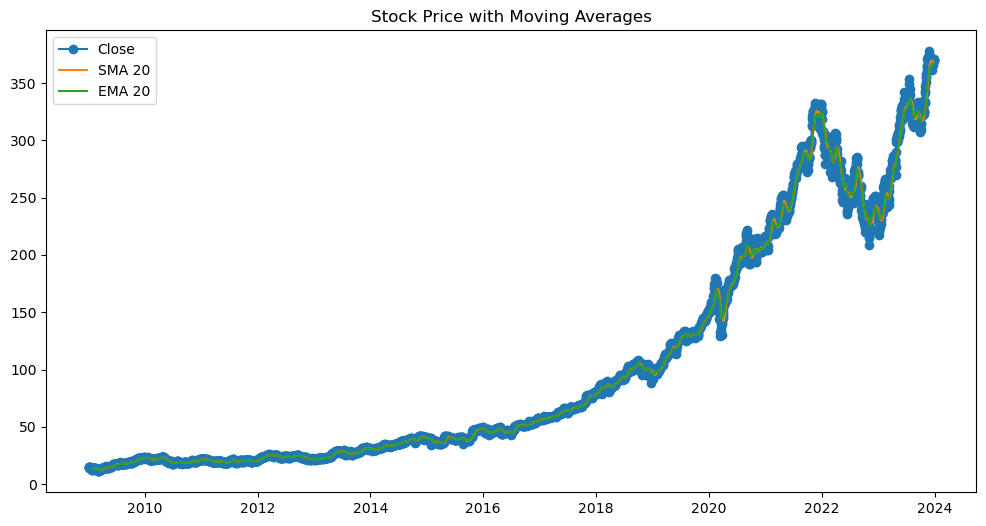

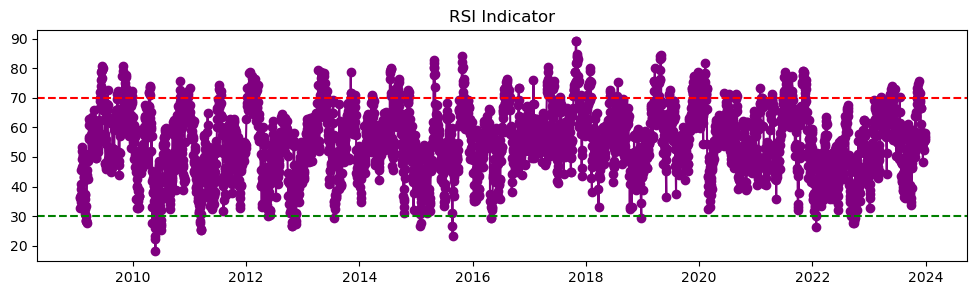

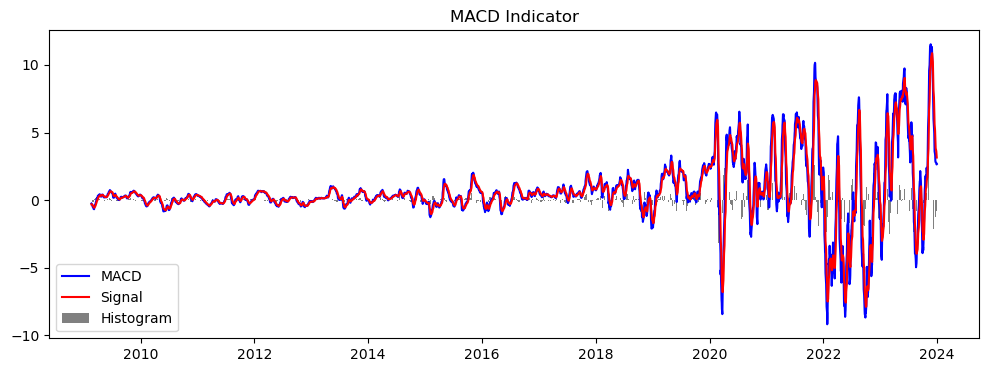

In [5]:
import matplotlib.pyplot as plt

# Price + Moving Averages
plt.figure(figsize=(12,6))
plt.plot(stock_data['Close'], label='Close', marker='o')
plt.plot(stock_data['SMA_20'], label='SMA 20')
plt.plot(stock_data['EMA_20'], label='EMA 20')
plt.title("Stock Price with Moving Averages")
plt.legend()
plt.show()

# RSI
plt.figure(figsize=(12,3))
plt.plot(stock_data['RSI_14'], label='RSI 14', color='purple', marker='o')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title("RSI Indicator")
plt.show()

# MACD
plt.figure(figsize=(12,4))
plt.plot(stock_data['MACD'], label='MACD', color='blue')
plt.plot(stock_data['MACD_signal'], label='Signal', color='red')
plt.bar(stock_data.index, stock_data['MACD_hist'], label='Histogram', color='gray')
plt.title("MACD Indicator")
plt.legend()
plt.show()
